In [1]:
#Import necessary libraries and packages
import warnings 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas_profiling as pp
import seaborn as sns

#Preferred settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

In [2]:
#Import Footprint and Biocapacity data
data = pd.read_csv('../Data/footprint-nfba-2019/data/nfa_2019_public_data.csv')
df = data

#Observe data shape and head
print(df.shape)
df.head()

(72186, 12)


,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,qscore
0,Armenia,1992,1,AreaPerCap,0.140292,0.199546,0.097188051,0.036888,0.029320,0.000000,5.032351e-01,3A
1,Armenia,1992,1,AreaTotHA,483000.000000,687000.000000,334600,127000.000000,100943.000800,0.000000,1.732543e+06,3A
2,Armenia,1992,1,BiocapPerCap,0.159804,0.135261,0.084003213,0.013742,0.033398,0.000000,4.262086e-01,3A
3,Armenia,1992,1,BiocapTotGHA,550176.242700,465677.972200,289207.1078,47311.551720,114982.279300,0.000000,1.467355e+06,3A
4,Armenia,1992,1,EFConsPerCap,0.387510,0.189462,1.26E-06,0.004165,0.033398,1.114093,1.728629e+00,3A


## Data Cleaning

In [3]:
#check random data chunk
data.sample(5)

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,qscore
35034,Kuwait,2008,118,BiocapPerCap,2.720346e-02,8.616489e-03,0.004292847,4.574641e-01,0.136044,0.00,6.336209e-01,3A
3303,Austria,1975,11,EFProdTotGHA,4.848709e+06,1.465150e+06,7832496.339,1.324265e+03,885730.683700,18986869.87,3.402028e+07,3A
19843,Fiji,1987,66,BiocapTotGHA,2.720341e+05,7.132269e+04,1084730.457,5.804051e+05,40336.951240,0.00,2.048829e+06,3A
9424,Cameroon,2006,32,AreaPerCap,4.029699e-01,1.117343e-01,1.161813697,7.181725e-02,0.035354,0.00,1.783689e+00,3A
14049,Costa Rica,2002,48,AreaTotHA,4.900000e+05,1.336000e+06,2422000,1.864000e+06,118000.999500,0.00,6.230001e+06,3A


We check the data-type of each column is of preferred data type

In [4]:
data.dtypes

country            object
year                int64
country_code        int64
record             object
crop_land         float64
grazing_land      float64
forest_land        object
fishing_ground    float64
built_up_land     float64
carbon            float64
total             float64
qscore             object
dtype: object

The Data type of the "country", "record", and "QScore" columns are of object type, which should be converted to String to be accessed or modified

In [5]:
#modify the datatype of country, record and QScore columns
data["country"] = data['country'].astype('string')
data["record"] = data['record'].astype('string')
data["qscore"] = data['qscore'].astype('string')

data.dtypes

country            string
year                int64
country_code        int64
record             string
crop_land         float64
grazing_land      float64
forest_land        object
fishing_ground    float64
built_up_land     float64
carbon            float64
total             float64
qscore             string
dtype: object

In order to carry out accurate pre-processing we have to first find out the number of Null Values in each column.

In [6]:
#check null values
print(data.isna().sum())
print(data.shape)

country               0
year                  0
country_code          0
record                0
crop_land         20472
grazing_land      20472
forest_land       20472
fishing_ground    20473
built_up_land     20473
carbon            20473
total                 9
qscore                1
dtype: int64
(72186, 12)


Since Entire rows contain NULL values, we have removed all such rows to clean our data. Rows were removed by removing rows that had less than 7 non-NULL cells.

In [7]:
#drop null values
df = data.dropna(axis=0, thresh=7)
#compression_opts = dict(method='zip', archive_name='out.csv')  
#df.to_csv('out.zip', index=False, compression=compression_opts) 

print(df.shape)
print(df.isna().sum())

(51714, 12)
country           0
year              0
country_code      0
record            0
crop_land         0
grazing_land      0
forest_land       0
fishing_ground    1
built_up_land     1
carbon            1
total             1
qscore            1
dtype: int64


The "qscore" is indicative of the reliability of Data. 
By dropping duplicate countries, we can realised for how reliable our overall data is for each country.

## Exploratory Data Analysis

(193, 12)


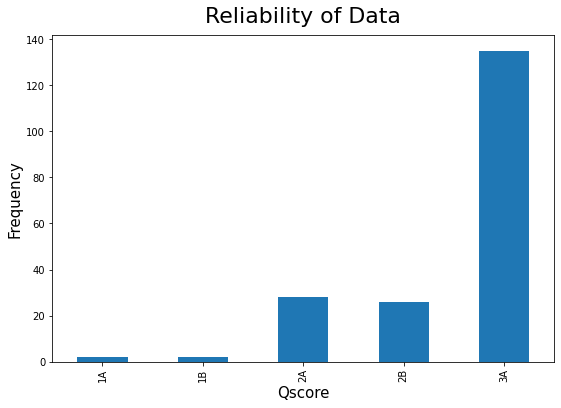

In [8]:
#drop duplicates
countryUniquedata = data.drop_duplicates(subset = "country")
countryUniqueCleaned = df.drop_duplicates(subset = "country")

print(countryUniquedata.shape)
#print(countryUnique.tail(20))

%matplotlib inline
#observe qscore
countryUniquedata.groupby('qscore').size().plot(kind = 'bar', figsize=(9, 6))
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Qscore", fontsize=15)
plt.title("Reliability of Data", y=1.02, fontsize=22)
plt.show()
#countryUniqueCleaned.groupby('QScore').size().plot(kind = 'bar')

By Filtering our data only Ecological Footprint Consumption, we can observe how World Carbon Footprint level have changed from 1969-2016



Text(0.5, 1.02, 'World Carbon Footprint')

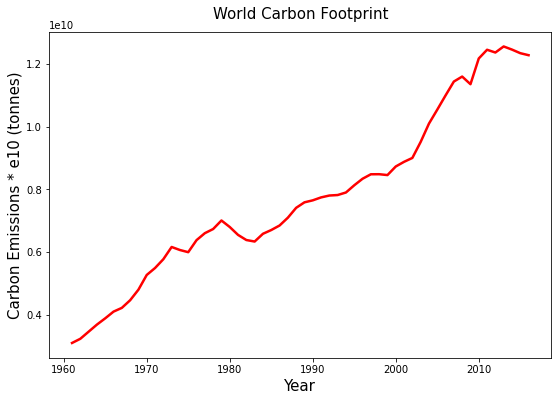

In [9]:
#data.loc[data.record == "EFConsTotGHA" & data.country == "World"]
#import matplotlib.pyplot as plt

worldData = data.loc[(data['record'] == "EFConsTotGHA") & (data['country'] == "World")]

worldData.sample(5)

#observe world carbon footprint
worldData.set_index('year')['carbon'].plot(figsize=(9,6), linewidth=2.5, color='red')
plt.xlabel("Year", fontsize=15)
plt.ylabel("Carbon Emissions * e10 (tonnes)", fontsize=15)
plt.title("World Carbon Footprint", y=1.02, fontsize=15)

The Ecological Footprint gives an idea on measure human demand on natural capital, that is the quantity of nature it takes to support people or an economy,  while the biocapacity is indicative of regenrative capacity of resources to meet demand in the ecosystem. 

Plotting both gives us the idea about the sustainability of our current usage.

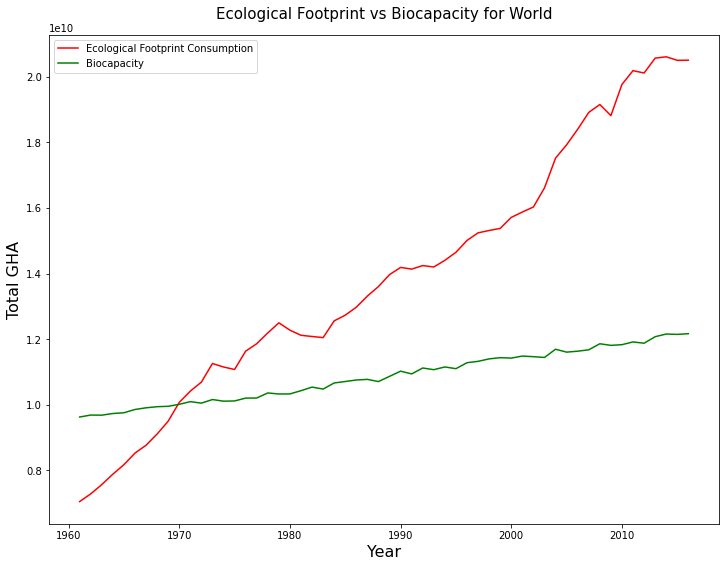

In [10]:
#data for analyzing ecological footprint and biocapacity 
worldEF = data.loc[(data['record'] == "EFConsTotGHA") & (data['country'] == "World")]
worldBC = data.loc[(data['record'] == "BiocapTotGHA") & (data['country'] == 'World')]

#worldEF.sample(5)
#worldBC.sample(5)

#observe Ecological Footprint vs Biocapacity
ax = plt.gca()
worldEF.plot(kind='line', x='year', y='total', color='red', figsize=(12,9), ax=ax)
worldBC.plot(kind='line', x='year', y='total', color='green', figsize=(12,9), ax=ax)
l=plt.legend()
l.get_texts()[0].set_text('Ecological Footprint Consumption')
l.get_texts()[1].set_text('Biocapacity')
plt.xlabel("Year", size=16)
plt.ylabel("Total GHA", size=16)
plt.title("Ecological Footprint vs Biocapacity for World", y=1.02, fontsize=15)
plt.show()


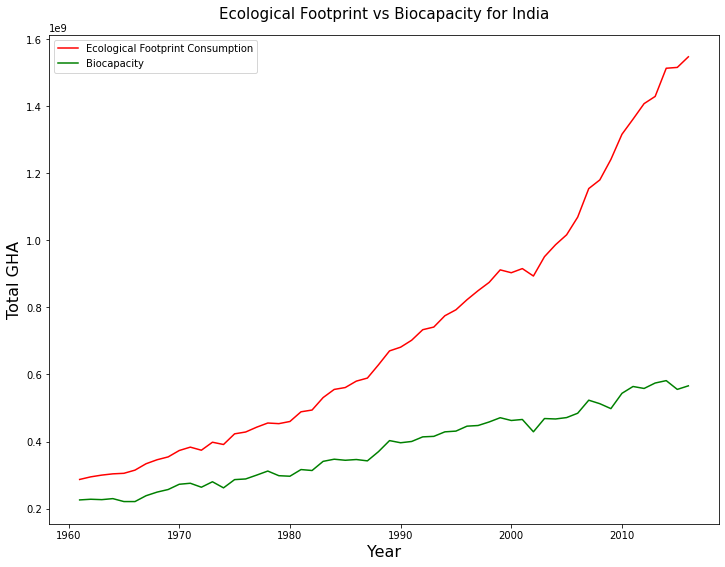

In [11]:
#data for analyzing ecological footprint and biocapacity 
IndiaEF = data.loc[(data['record'] == "EFConsTotGHA") & (data['country'] == "India")]
IndiaBC = data.loc[(data['record'] == "BiocapTotGHA") & (data['country'] == 'India')]

#worldEF.sample(5)
#worldBC.sample(5)

#observe Ecological Footprint vs Biocapacity
ax = plt.gca()
IndiaEF.plot(kind='line', x='year', y='total', color='red', figsize=(12,9), ax=ax)
IndiaBC.plot(kind='line', x='year', y='total', color='green', figsize=(12,9), ax=ax)
l=plt.legend()
l.get_texts()[0].set_text('Ecological Footprint Consumption')
l.get_texts()[1].set_text('Biocapacity')
plt.xlabel("Year", size=16)
plt.ylabel("Total GHA", size=16)
plt.title("Ecological Footprint vs Biocapacity for India", y=1.02, fontsize=15)
plt.show()

Per Capita value of both measures gives an idea of resources consumed or are available per person. 
The large decrease in Biocapacity values are due to a lower increase in actual Biocapacity values from 1969.

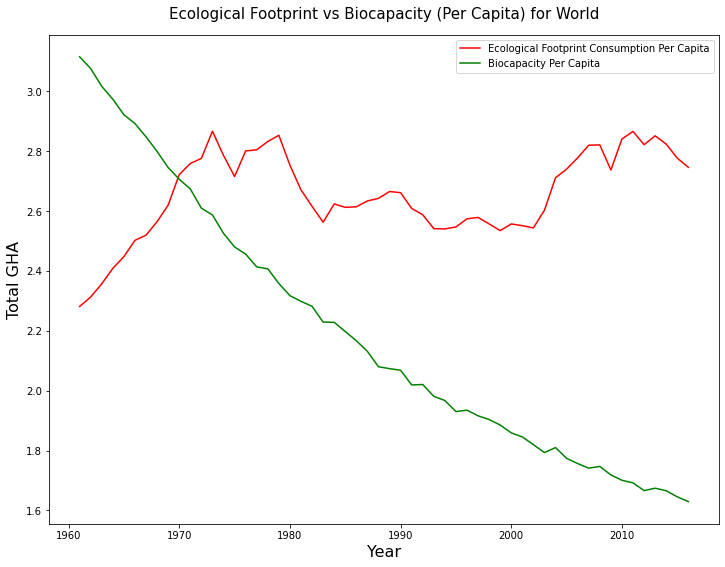

In [12]:
#data for analyzing ecological footprint and biocapacity 
worldEFCap = data.loc[(data['record'] == "EFConsPerCap") & (data['country'] == "World")]
worldBCCap = data.loc[(data['record'] == "BiocapPerCap") & (data['country'] == "World")]

#worldEFCap.sample(5)
#worldBCCap.sample(5)

#observe Ecological Footprint vs Biocapacity Per Capita
ax = plt.gca()
worldEFCap.plot(kind='line', x='year', y='total', color='red', figsize=(12,9), ax=ax)
worldBCCap.plot(kind='line', x='year', y='total', color='green', figsize=(12,9), ax=ax)
l=plt.legend()
l.get_texts()[0].set_text('Ecological Footprint Consumption Per Capita')
l.get_texts()[1].set_text('Biocapacity Per Capita')
plt.xlabel("Year", size=16)
plt.ylabel("Total GHA", size=16)
plt.title("Ecological Footprint vs Biocapacity (Per Capita) for World", y=1.02, fontsize=15)
plt.show()


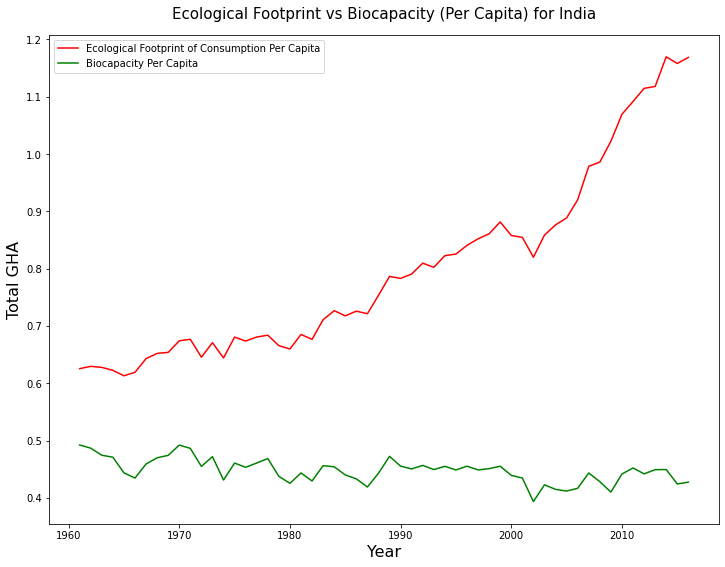

In [13]:
#data for analyzing ecological footprint and biocapacity 
IndiaEFCap = data.loc[(data['record'] == "EFConsPerCap") & (data['country'] == "India")]
IndiaBCCap = data.loc[(data['record'] == "BiocapPerCap") & (data['country'] == "India")]

#worldEFCap.sample(5)
#worldBCCap.sample(5)

x = np.arange(0,10,0.1)
#observe Ecological Footprint vs Biocapacity Per Capita
ax = plt.gca()
IndiaEFCap.plot(kind='line', x='year', y='total', color='red', figsize=(12,9), ax=ax)
IndiaBCCap.plot(kind='line', x='year', y='total', color='green', figsize=(12,9), ax=ax)

l=plt.legend()
l.get_texts()[0].set_text('Ecological Footprint of Consumption Per Capita')
l.get_texts()[1].set_text('Biocapacity Per Capita')
plt.xlabel("Year", size=16)
plt.ylabel("Total GHA", size=16)
plt.title("Ecological Footprint vs Biocapacity (Per Capita) for India", y=1.02, fontsize=15)
plt.show()

Countries with higher Ecological Footprint often cause a skew in data. Below, we've found contries with highest Ecological Footprint in 1970 and 2016

In [14]:
#data for analyzing highest ecological footprint in 1970 & 2016 
EFData1970 = df.loc[(df['record'] == "EFConsTotGHA") & (df['country'] != "World") & (df['year'] == 1970)]
EFData2016 = df.loc[(df['record'] == "EFConsTotGHA") & (df['country'] != "World") & (df['year'] == 2016)]

#grouped=EFData1970['total'].max()
#grouped.sort_index(ascending=True)

#EFData1970.sample(5)
#EFData2016.sample(5)

#observe countries with highest ecological footprint in 1970 and 2016 respectively
highEF1970 = EFData1970.sort_values(by = 'carbon', ascending = False)
highEF2016 = EFData2016.sort_values(by = 'carbon', ascending = False)

print(highEF1970[['country','year','carbon','total','qscore']].head())
print('  --------------------------------------------------------------------')
print(highEF2016[['country','year','carbon','total','qscore']].head())


                        country  year        carbon         total qscore
65551  United States of America  1970  1.572516e+09  2.172632e+09     3A
23101                   Germany  1970  3.820388e+08  5.355856e+08     3A
32149                     Japan  1970  3.171436e+08  5.292070e+08     3A
71367                     China  1970  2.898878e+08  8.902225e+08     3A
64903            United Kingdom  1970  2.577190e+08  3.929237e+08     3A
  --------------------------------------------------------------------
                        country  year        carbon         total qscore
71735                     China  2016  3.578043e+09  5.195886e+09     3A
65919  United States of America  2016  1.819740e+09  2.611074e+09     3A
28501                     India  2016  8.314653e+08  1.547649e+09     3A
53503        Russian Federation  2016  4.701226e+08  7.428478e+08     3A
32517                     Japan  2016  4.329122e+08  5.739390e+08     3A


We use scatterplot to observe how Ecological Footprint values have changed over time. This gives us an idea about how the production values have increase with time

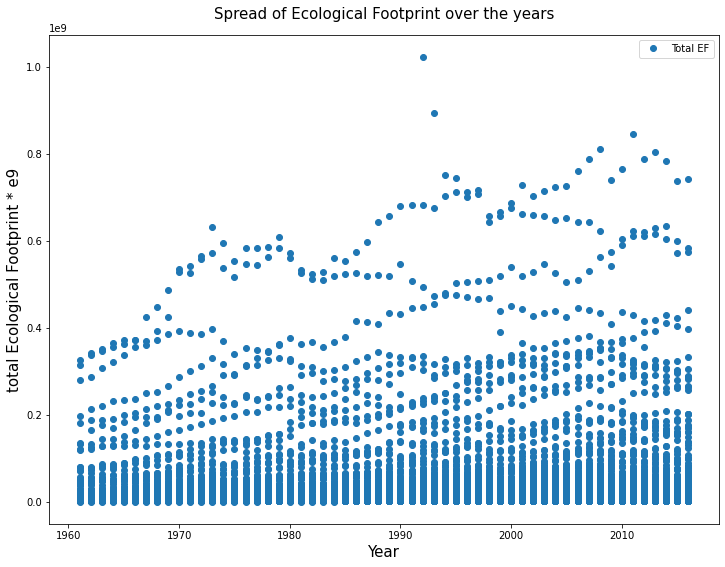

In [15]:
#data for ecological footprint spread over the years
#year = df.loc[(df['record'] == "EFConsTotGHA") & (df['country'] != "World") & (df['country'] != "China") & (df['country'] != " United States of America")]

country = ['China',  "United States of America", "India", "World"]
yearData = df.loc[(df['record'] == "EFConsTotGHA") & (~df['country'].isin(country))]
#print(yearData)
print()

#observe the spread of Ecological Footprint over the years
yearData.plot(x='year', y='total', style='o', figsize=(12,9))
plt.xlabel("Year", fontsize=15)
plt.ylabel("total Ecological Footprint * e9", fontsize=15)
plt.title("Spread of Ecological Footprint over the years", y=1.02, fontsize=15)
L=plt.legend()
L.get_texts()[0].set_text('Total EF')

The plots below compares Ecological Footprint Consumption and BioCapacity values over time for data from all countries for the world category

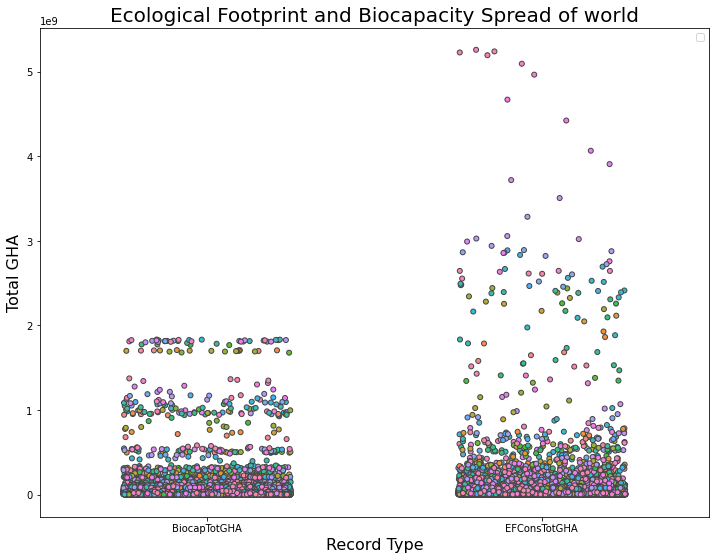

In [16]:
array = ['EFConsTotGHA', 'BiocapTotGHA']
recordData = df.loc[(df['record'].isin(array)) & (df['country'] != "World")]

#observe Ecological Footprint and Biocapacity over time
plt.figure(figsize=(12,9))
axis = sns.stripplot(x='record', y='total', data=recordData, jitter=0.25, linewidth=1, hue='year')
#axis.set_xticklabels(axis.get_xticklabels(), rotation=90)

axis.set_title('Ecological Footprint and Biocapacity Spread of world', fontsize=20)
plt.xlabel("Record Type", size=16)
plt.ylabel("Total GHA", size=16)
axis.legend([],[], frameon=True)

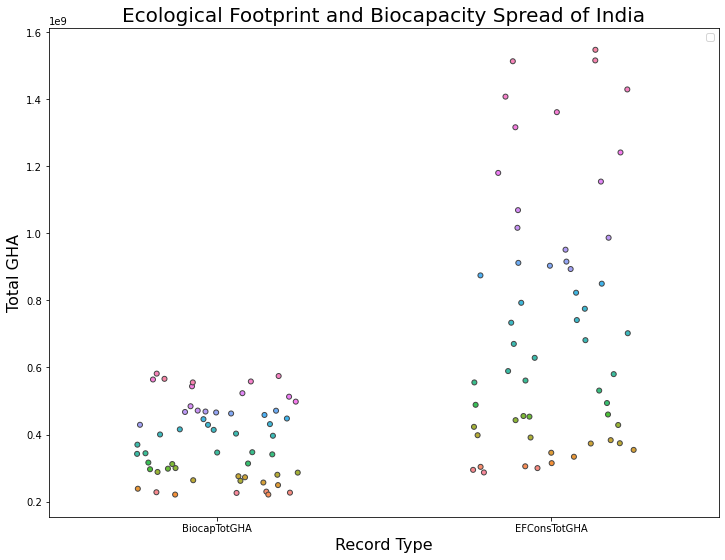

In [17]:
array = ['EFConsTotGHA', 'BiocapTotGHA']
recordData = df.loc[(df['record'].isin(array)) & (df['country'] == "India")]

#observe Ecological Footprint and Biocapacity over time
plt.figure(figsize=(12,9))
axis = sns.stripplot(x='record', y='total', data=recordData, jitter=0.25, linewidth=1, hue='year')
#axis.set_xticklabels(axis.get_xticklabels(), rotation=90)

axis.set_title('Ecological Footprint and Biocapacity Spread of India',  fontsize=20)
plt.xlabel("Record Type", size=16)
plt.ylabel("Total GHA", size=16)
axis.legend([],[], frameon=True)

The Boxplot supports the analysis that can be drawn form the plot above.
Removing the top 3 countries gives a better idea of how Ecological Footprint and Bio-Capacity is distributed between countries

Text(0, 0.5, 'Record Type')

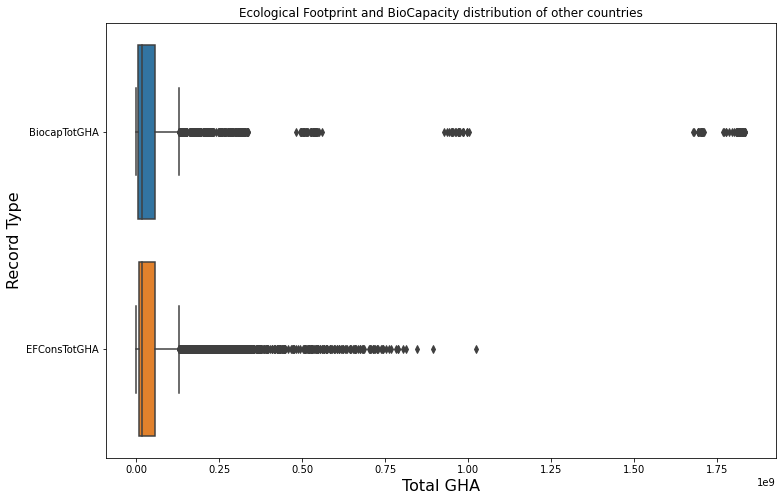

In [18]:
outliers = ['China',  "United States of America", "India", "World"]
array = ['EFConsTotGHA','BiocapTotGHA']

#observe distribution of Ecological Footprint and Biocapacity of other countries than top 3
plt.figure(figsize=(12,8))
boxData = df.loc[(df['record'].isin(array)) & (~df['country'].isin(outliers))]

sns.boxplot(x='total', y='record', data=boxData).set_title('Ecological Footprint and BioCapacity distribution of other countries')
plt.xlabel('Total GHA', size=16)
plt.ylabel('Record Type', size=16)


in order to see how the countries producing the most carbon Footprints have changed, we plot a pie chart to show the top 5 countries in 1970 and 2016, along with how the rest of the world compares with them

Text(0.5, 1.02, 'Carbon Footprint between countries for 2016')

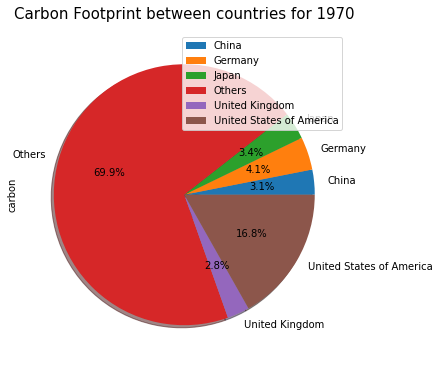

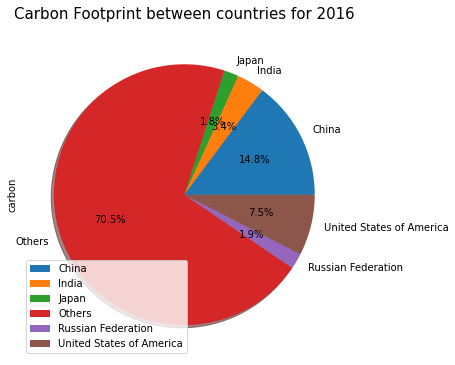

In [19]:
#Data of 1970
top51970 = ['Germany', 'China', 'Japan', 'United States of America', 'United Kingdom']
top61970 = df.loc[(df['record'] == "EFConsTotGHA") & (df['country'].isin(top51970)) & (df['year'] == 1970)]
othersRaw1970 = df.loc[(df['record'] == "EFConsTotGHA") & (~df['country'].isin(top51970)) & (df['year'] == 1970)]

#carbon footprint of non top 5 countries
totOtherCarbon1970 = othersRaw1970['carbon'].sum()

others1970 = pd.DataFrame({"country":['Others'],
                          "carbon":[totOtherCarbon1970]})
#represents top 5 and rest of the world
top61970=top61970.append(others1970, ignore_index=True)

#Data of 2016
top52016 = ['United States of America', 'China', 'India', "Japan", 'Russian Federation']
top62016 = df.loc[(df['record'] == "EFConsTotGHA") & (df['country'].isin(top52016)) & (df['year'] == 2016)]
othersRaw2016 = df.loc[(df['record'] == "EFConsTotGHA") & (~df['country'].isin(top52016)) & (df['year'] == 2016)]
totOtherCarbon2016 = othersRaw2016['carbon'].sum()

others2016 = pd.DataFrame({"country":['Others'],
                          "carbon":[totOtherCarbon2016]})
top62016=top62016.append(others2016, ignore_index=True)

#Observe Carbon Footprint between countries
#1970
top61970.groupby(['country']).sum().plot(kind='pie', y='carbon', legend=True, autopct='%1.1f%%', figsize=(9,6), shadow=True)
plt.title("Carbon Footprint between countries for 1970", y=1.02, fontsize=15)
#2016
top62016.groupby(['country']).sum().plot(kind='pie', y='carbon', legend=True, autopct='%1.1f%%', figsize=(9,6), shadow=True)
plt.title("Carbon Footprint between countries for 2016", y=1.02, fontsize=15)



Finding countries with highest/lowest Bipcapacity values in 1970 and 2016

In [20]:
#data for analyzing highest Biocapactiy in 1970 & 2016 
BCData1970 = df.loc[(df['record'] == "BiocapTotGHA") & (df['country'] != "World") & (df['year'] == 1970)]
BCData2016 = df.loc[(df['record'] == "BiocapTotGHA") & (df['country'] != "World") & (df['year'] == 2016)]

#grouped=EFData1970['total'].max()
#grouped.sort_index(ascending=True)

#EFData1970.sample(5)
#EFData2016.sample(5)

#observe countries with highest ecological footprint in 1970 and 2016 respectively
highBC1970 = BCData1970.sort_values(by = 'total', ascending = False)
highBC2016 = BCData2016.sort_values(by = 'total', ascending = False)

print(highBC1970[['country','year','total','qscore']].head(5))
print('  ------------------------------------------------------')
print(highBC2016[['country','year','total','qscore']].head(5))

                        country  year         total qscore
6795                     Brazil  1970  1.699972e+09     3A
65549  United States of America  1970  9.641094e+08     3A
71365                     China  1970  7.653499e+08     3A
9587                     Canada  1970  4.960570e+08     3A
2811                  Australia  1970  3.115044e+08     3A
  ------------------------------------------------------
                        country  year         total qscore
7163                     Brazil  2016  1.806630e+09     3A
71733                     China  2016  1.373629e+09     3A
65917  United States of America  2016  1.174980e+09     3A
53501        Russian Federation  2016  1.001545e+09     3A
28499                     India  2016  5.661150e+08     3A


Text(0.5, 1.02, 'Biocapacity between countries for 2016')

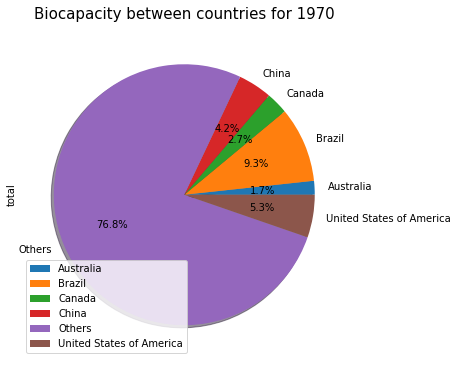

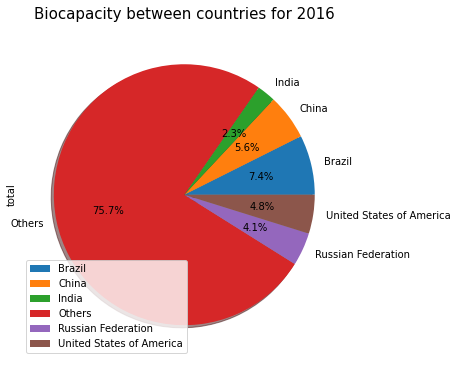

In [21]:
#Data of 1970
top51970 = ['Brazil', 'China', 'Canada', 'Australia', 'United States of America']
top61970 = df.loc[(df['record'] == "BiocapTotGHA") & (df['country'].isin(top51970)) & (df['year'] == 1970)]
othersRaw1970 = df.loc[(df['record'] == "BiocapTotGHA") & (~df['country'].isin(top51970)) & (df['year'] == 1970)]

#Biocapacity of non top 5 countries
totOtherCarbon1970 = othersRaw1970['total'].sum()

others1970 = pd.DataFrame({"country":['Others'],
                          "total":[totOtherCarbon1970]})
#represents top 5 and rest of the world
top61970=top61970.append(others1970, ignore_index=True)

#Data of 2016
top52016 = ['Brazil', 'China', 'United States of America', "India", 'Russian Federation']
top62016 = df.loc[(df['record'] == "BiocapTotGHA") & (df['country'].isin(top52016)) & (df['year'] == 2016)]
othersRaw2016 = df.loc[(df['record'] == "BiocapTotGHA") & (~df['country'].isin(top52016)) & (df['year'] == 2016)]
totOtherCarbon2016 = othersRaw2016['total'].sum()

others2016 = pd.DataFrame({"country":['Others'],
                          "total":[totOtherCarbon2016]})
top62016=top62016.append(others2016, ignore_index=True)

#Observe Biocapacity between countries
#1970
top61970.groupby(['country']).sum().plot(kind='pie', y='total', legend=True, autopct='%1.1f%%', figsize=(9,6), shadow=True)
plt.title("Biocapacity between countries for 1970", y=1.02, fontsize=15)
#2016
top62016.groupby(['country']).sum().plot(kind='pie', y='total', legend=True, autopct='%1.1f%%', figsize=(9,6), shadow=True)
plt.title("Biocapacity between countries for 2016", y=1.02, fontsize=15)



In order to gauge the co-relation between our variables, we used a correlation matrix represented through a heatmap. Different heatmaps for each type of record were drawn.

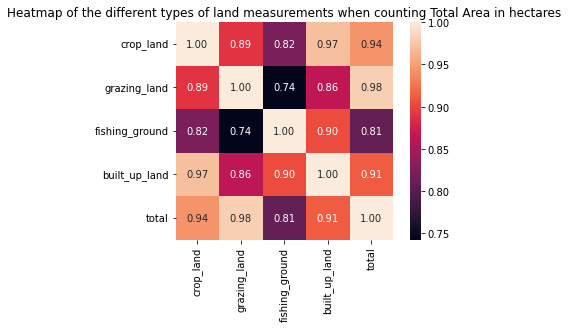

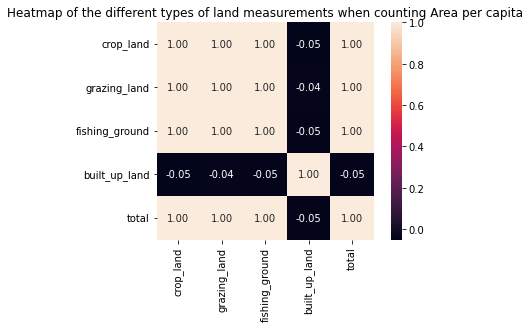

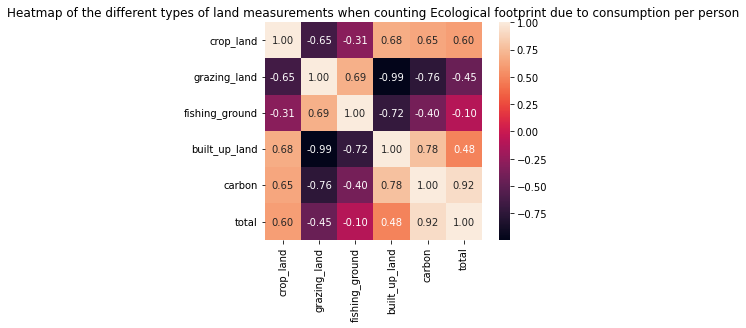

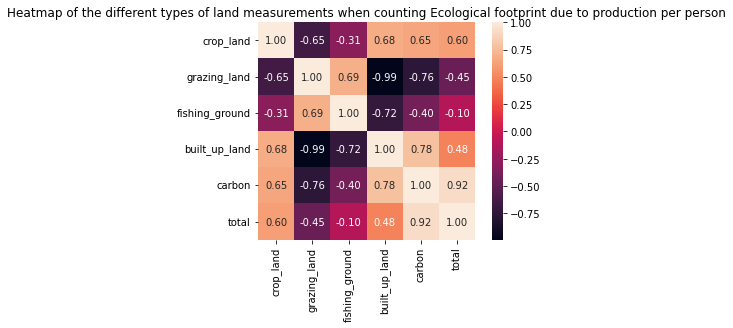

In [22]:
#data for world area, biocapacity, Ecological Footprint consumption and production per capita
worldDataArea = df.loc[(df['country'] == "World") & (df['record'] == "AreaTotHA") ,['crop_land','grazing_land','forest_land','fishing_ground','built_up_land','total']]
worldDataBiocap = df.loc[(df['country'] == "World") & (df['record'] == "AreaPerCap") ,['crop_land','grazing_land','forest_land','fishing_ground','built_up_land','total']]
worldDataEFConsPerCap = df.loc[(df['country'] == "World") & (df['record'] == "EFConsPerCap") ,['crop_land','grazing_land','forest_land','fishing_ground','built_up_land','carbon','total']]
worldDataEFProdPerCap = df.loc[(df['country'] == "World") & (df['record'] == "EFProdPerCap") ,['crop_land','grazing_land','forest_land','fishing_ground','built_up_land','carbon','total']]

#observe correlation 
corrmatA = worldDataArea.corr()
corrmatBC = worldDataBiocap.corr()
corrmatEFCP = worldDataEFConsPerCap.corr()
corrmatEFPP = worldDataEFProdPerCap.corr()

#observe heatmap
sns.heatmap(corrmatA,square=True,annot=True, fmt='.2f')
plt.title("Heatmap of the different types of land measurements when counting Total Area in hectares")
plt.show()
plt.title("Heatmap of the different types of land measurements when counting Area per capita")
sns.heatmap(corrmatBC,square=True,annot=True, fmt='.2f')
plt.show()
sns.heatmap(corrmatEFCP,square=True,annot=True, fmt='.2f')
plt.title("Heatmap of the different types of land measurements when counting Ecological footprint due to consumption per person")
plt.show()
sns.heatmap(corrmatEFPP,square=True,annot=True, fmt='.2f')
plt.title("Heatmap of the different types of land measurements when counting Ecological footprint due to production per person")
plt.show()

In order to gauge correlation of Ecological Footprint due to per capita consumption and production of Indian population, heatmaps are drawn

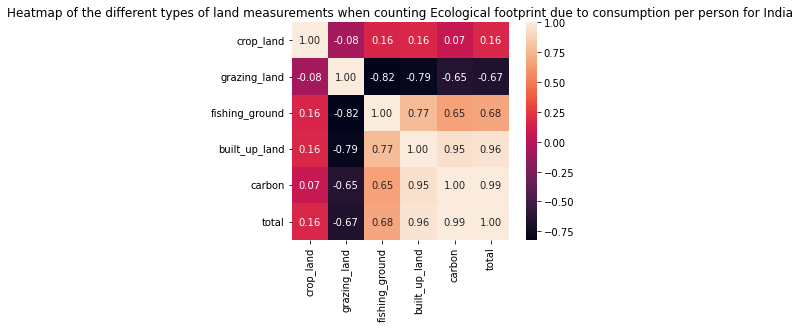

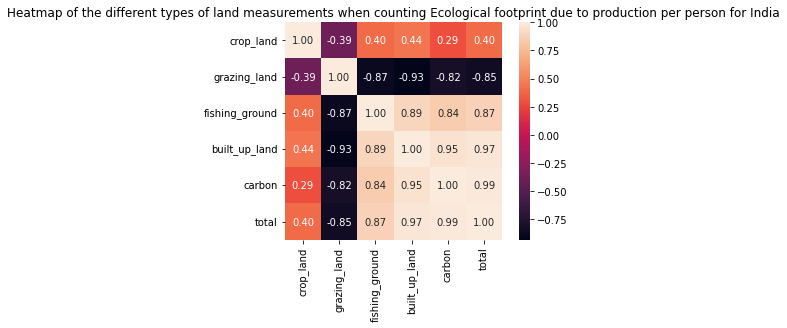

In [23]:
IndiaEFConsPerCap = df.loc[(df['country'] == "India") & (df['record'] == "EFConsPerCap") ,['crop_land','grazing_land','forest_land','fishing_ground','built_up_land','carbon','total']]
IndiaEFProdPerCap = df.loc[(df['country'] == "India") & (df['record'] == "EFProdPerCap") ,['crop_land','grazing_land','forest_land','fishing_ground','built_up_land','carbon','total']]

corrmatICP = IndiaEFConsPerCap.corr()
corrmatIPP = IndiaEFProdPerCap.corr()

sns.heatmap(corrmatICP,square=True,annot=True, fmt='.2f')
plt.title("Heatmap of the different types of land measurements when counting Ecological footprint due to consumption per person for India")
plt.show()

sns.heatmap(corrmatIPP,square=True,annot=True, fmt='.2f')
plt.title("Heatmap of the different types of land measurements when counting Ecological footprint due to production per person for India")
plt.show()

Ecological Footprint values in our data are distiguished on how resources are divided between different types of Land and Water resources. The following line graphs shows how these individual resources have changed with time for World and India

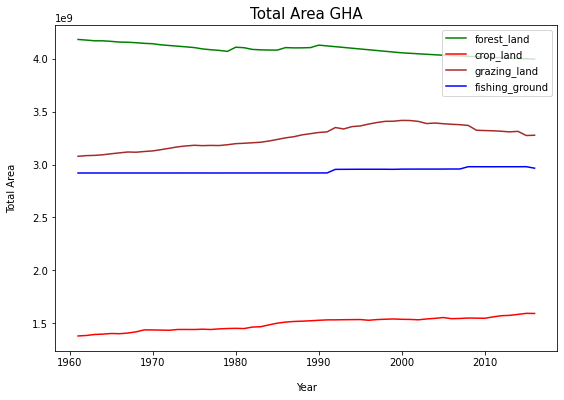

In [24]:
#observe total Area values of world
ax = plt.gca()
worldDataAreaLand = df.loc[(df['country'] == "World") & (df['record'] == "AreaTotHA") ,['year','crop_land','grazing_land','forest_land','fishing_ground','built_up_land']]
worldDataAreaLand.plot(kind='line',x='year',y='forest_land', color='green', figsize=(9,6), ax=ax)
worldDataAreaLand.plot(kind='line',x='year',y='crop_land', color='red', figsize=(9, 6), ax=ax)
worldDataAreaLand.plot(kind='line',x='year',y='grazing_land', color='brown', figsize=(9, 6), ax=ax)
worldDataAreaLand.plot(kind='line',x='year',y='fishing_ground', color='blue', figsize=(9, 6), ax=ax)

plt.xlabel("Year", labelpad=15)
plt.ylabel("Total Area", labelpad=15)
plt.title("Total Area GHA", fontsize=15)
plt.show()

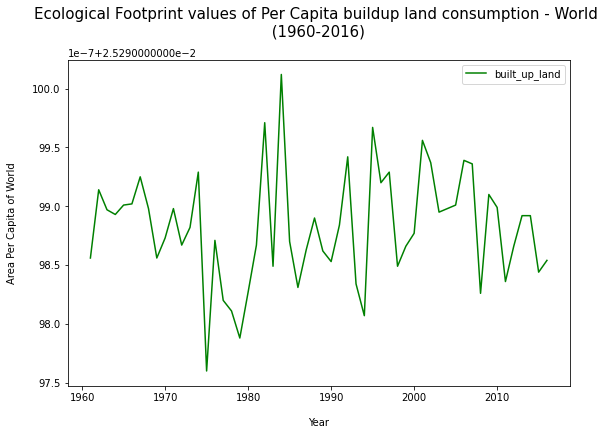

In [25]:
ax = plt.gca()
#observe total built up area of world
worldDataAreaPerCapita = df.loc[(df['country'] == "World") & (df['record'] == "AreaPerCap") ,['year','crop_land','grazing_land','forest_land','fishing_ground','built_up_land']]
worldDataAreaPerCapita.plot(kind='line',x='year',y='built_up_land', color='green', figsize=(9, 6), ax=ax)
plt.xlabel("Year", labelpad=15)
plt.ylabel("Area Per Capita of World", labelpad=15)
plt.title("Ecological Footprint values of Per Capita buildup land consumption - World \n (1960-2016) \n ", fontsize = 15)
plt.show()

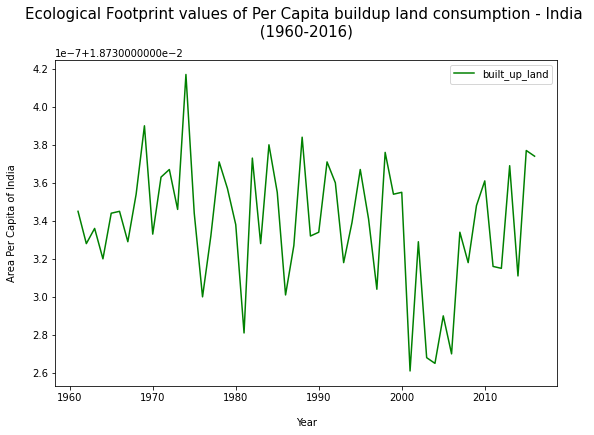

In [26]:
ax = plt.gca()
#observe total built up area of India
IndiaDataAreaPerCapita = df.loc[(df['country'] == "India") & (df['record'] == "AreaPerCap") ,['year','crop_land','grazing_land','forest_land','fishing_ground','built_up_land']]
IndiaDataAreaPerCapita.plot(kind='line',x='year',y='built_up_land', color='green', figsize=(9, 6), ax=ax)
plt.xlabel("Year", labelpad=15)
plt.ylabel("Area Per Capita of India", labelpad=15)
plt.title("Ecological Footprint values of Per Capita buildup land consumption - India \n (1960-2016) \n ", fontsize = 15)
plt.show()

Expressing the values per capita gives the following graph.



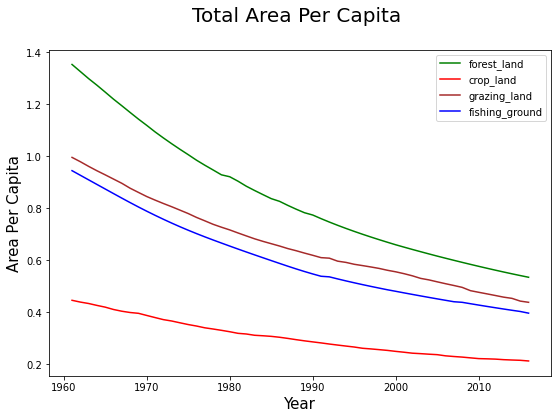

In [27]:

#observe ecological footprint values of world
ax = plt.gca()
worldDataAreaPerCapita = df.loc[(df['country'] == "World") & (df['record'] == "AreaPerCap") ,['year','crop_land','grazing_land','forest_land','fishing_ground','built_up_land']]
worldDataAreaPerCapita.plot(kind='line',x='year',y='forest_land', color='green', figsize=(9,6), ax=ax)
worldDataAreaPerCapita.plot(kind='line',x='year',y='crop_land', color='red', figsize=(9, 6), ax=ax)
worldDataAreaPerCapita.plot(kind='line',x='year',y='grazing_land', color='brown', figsize=(9, 6), ax=ax)
worldDataAreaPerCapita.plot(kind='line',x='year',y='fishing_ground', color='blue', figsize=(9, 6), ax=ax)

plt.xlabel("Year", fontsize=15)
plt.ylabel("Area Per Capita", fontsize=15)
plt.title("Total Area Per Capita \n", fontsize = 20)
plt.show()

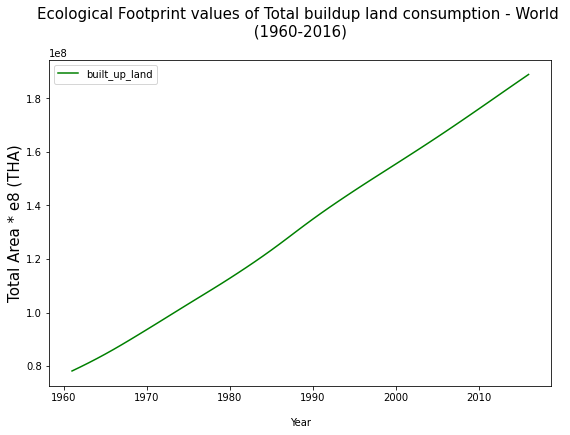

In [28]:
ax = plt.gca()
#Observe total per captia values of world
worldDataAreaLand = df.loc[(df['country'] == "World") & (df['record'] == "AreaTotHA") ,['year','crop_land','grazing_land','forest_land','fishing_ground','built_up_land']]
worldDataAreaLand.plot(kind='line',x='year',y='built_up_land', color='green', figsize=(9,6), ax=ax)
plt.xlabel("Year", labelpad=15)
plt.ylabel("Total Area * e8 (THA)", fontsize=15)
plt.title("Ecological Footprint values of Total buildup land consumption - World \n (1960-2016) \n ", fontsize = 15)
plt.show()

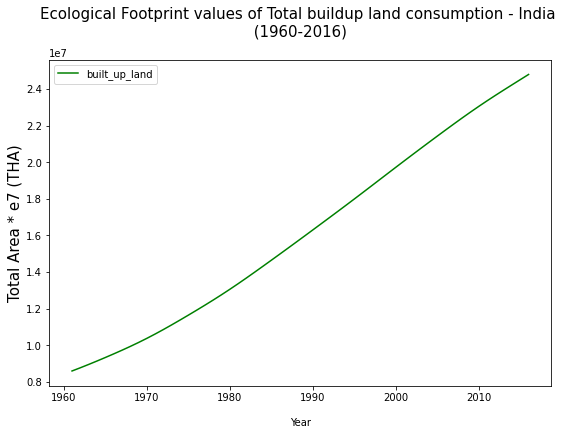

In [29]:
ax = plt.gca()
#Observe total per captia values of India
IndiaDataAreaLand = df.loc[(df['country'] == "India") & (df['record'] == "AreaTotHA") ,['year','crop_land','grazing_land','forest_land','fishing_ground','built_up_land']]
IndiaDataAreaLand.plot(kind='line',x='year',y='built_up_land', color='green', figsize=(9,6), ax=ax)
plt.xlabel("Year", labelpad=15)
plt.ylabel("Total Area * e7 (THA)", fontsize=15)
plt.title("Ecological Footprint values of Total buildup land consumption - India \n (1960-2016) \n ", fontsize = 15)
plt.show()

From above we can observe the ecological footprint patterns resultant due to consumption of resources. This gives an idea about how the resources are over used and depleted compared to the respective biocapacity.

These consumptions contribute to increase in carbon emissions. As the forest and land cover decreases, the carbon sequestration capacity of the area decreases, hence results in increase in carbon emissions, and carbon concentration in atmosphere increases proportionally.

Let's observe the carbon emissions resultant due to consumption


Text(0.5, 1.0, 'Carbon Emissions due to consumption of world \n (1960-2016)')

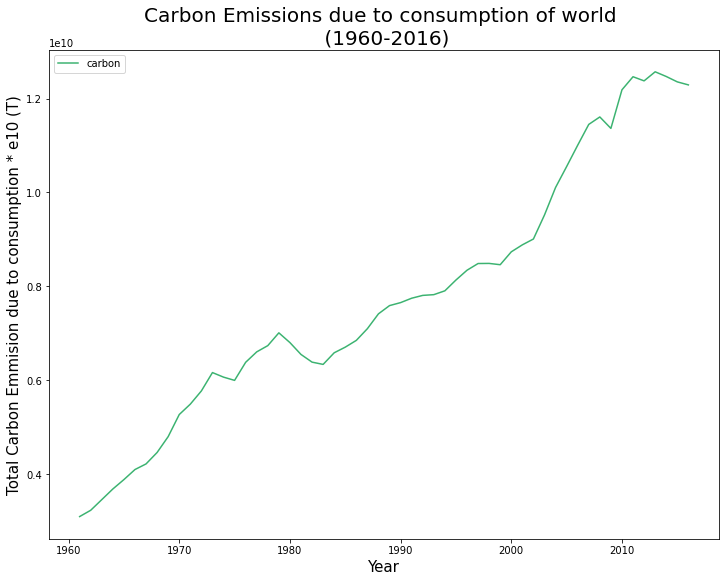

In [30]:
ax = plt.gca()
#observe Carbon Emissions due to consumption of world
worldco2 = df.loc[(df['country'] == "World") & (df['record'] == "EFConsTotGHA") ,['year','carbon']]
worldco2.plot(kind='line',x='year',y='carbon', color='mediumseagreen', figsize=(12,9), ax=ax)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Total Carbon Emmision due to consumption * e10 (T)", fontsize=15)
plt.title("Carbon Emissions due to consumption of world \n (1960-2016)", fontsize=20)

Text(0.5, 1.0, 'Carbon Emissions due to consumption of India \n (1960-2016)')

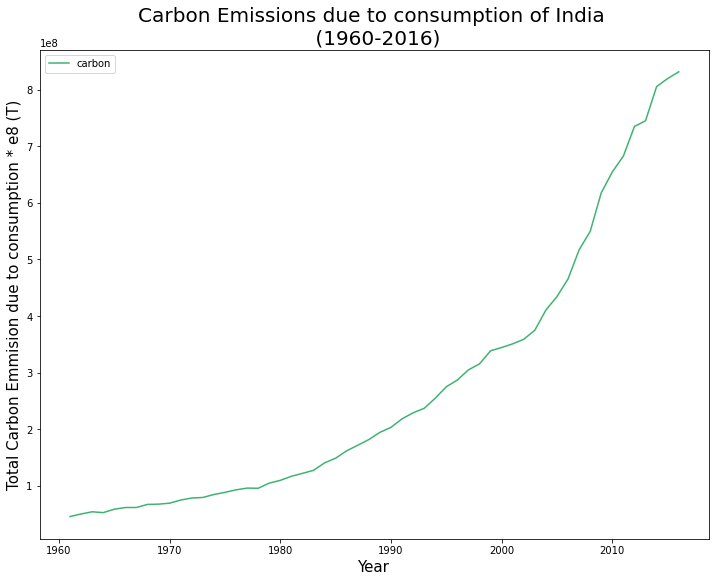

In [31]:
ax = plt.gca()
#observe Carbon Emissions due to consumption of India
Indiaco2 = df.loc[(df['country'] == "India") & (df['record'] == "EFConsTotGHA") ,['year','carbon']]
Indiaco2.plot(kind='line',x='year',y='carbon', color='mediumseagreen', figsize=(12,9), ax=ax)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Total Carbon Emmision due to consumption * e8 (T)", fontsize=15)
plt.title("Carbon Emissions due to consumption of India \n (1960-2016)", fontsize=20)

#### Analysing Earths Required By India 

In [32]:
#Import Footprint and Biocapacity data
ecodf = pd.read_csv('../Data/footprint-nfba-2019/data/EFdata.csv')

clean_df = pd.DataFrame(ecodf.iloc[:,[0,1,2,3,4,10,16,17,18]])
clean_df.rename(columns={
    "Total Ecological Footprint": "Eco Footprint per Person", 
    "Total Biocapacity": "Biocapacity per Person",
    "GDP per Capita": "GDP per Capita (USD)",
}, inplace = True)
clean_df.dtypes

# Change GDP per Capita data to float
clean_df['GDP per Capita (USD)'] = clean_df['GDP per Capita (USD)'].replace('[\$,]', '', regex=True).astype(float)

# Drop rows with null values
clean_df.count()   # Some null values in HDI, GDP
clean_df.dropna(how='any', inplace=True)

clean_df.head()


,Country,Region,Population (millions),HDI,GDP per Capita (USD),Eco Footprint per Person,Biocapacity per Person,Biocapacity Deficit or Reserve,Earths Required
0,Afghanistan,Middle East/Central Asia,29.82,0.46,614.66,0.79,0.50,-0.30,0.46
1,Albania,Northern/Eastern Europe,3.16,0.73,4534.37,2.21,1.18,-1.03,1.27
2,Algeria,Africa,38.48,0.73,5430.57,2.12,0.59,-1.53,1.22
3,Angola,Africa,20.82,0.52,4665.91,0.93,2.55,1.61,0.54
4,Antigua and Barbuda,Latin America,0.09,0.78,13205.10,5.38,0.94,-4.44,3.11


**HDI Groups vs Ecological Footprint**

In [33]:
# Create new HDI group dataframe
hdi_df = pd.DataFrame(clean_df)

# Create bins by HDI group
hdi_bins = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hdi_groups = ["<0.4", "0.41-0.5", "0.51-0.6", "0.61-0.7", "0.71-0.8", "0.81-0.9", ">0.9"]

hdi_df["HDI Groups"] = pd.cut(hdi_df["HDI"], hdi_bins, labels=hdi_groups)

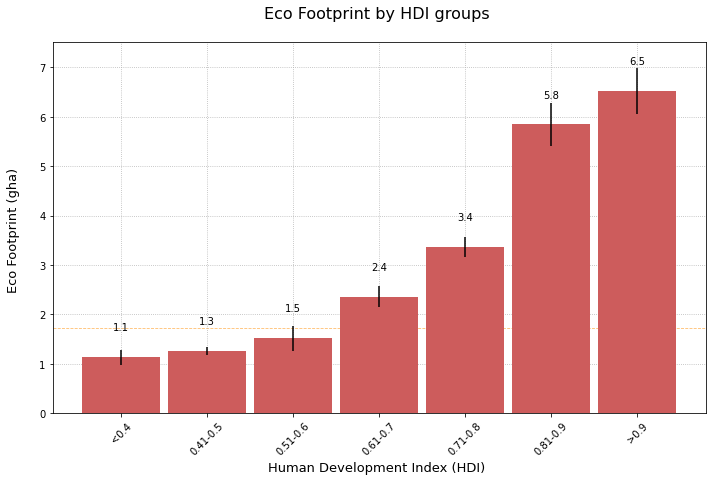

In [41]:
# calculating mean
hdi_eco_footprint = hdi_df.groupby("HDI Groups").mean()['Eco Footprint per Person']
hdi_eco_footprint = pd.DataFrame(hdi_eco_footprint)

# calculating standard error
hdi_footprint_sem = hdi_df.groupby("HDI Groups").sem()['Eco Footprint per Person']
hdi_footprint_sem = pd.DataFrame(hdi_footprint_sem)

# data lists
eco_footprint = hdi_eco_footprint['Eco Footprint per Person'].tolist()
sem = hdi_footprint_sem['Eco Footprint per Person'].tolist()

# Bar chart
fig, ax = plt.subplots(figsize = (10,7))
x_axis = np.arange(len(hdi_groups))
ax.set_xticks(x_axis)
ax.set_xticklabels(hdi_groups, rotation = 45)
plt.ylim(0, max(eco_footprint)+1.0)

plt.grid(linestyle='dotted', zorder=0)
plt.axhline(y=1.73, linewidth=0.8, linestyle = '--', color='darkorange', alpha=0.6, zorder=0)

plt.xlabel('Human Development Index (HDI) \n', fontsize=13)
plt.ylabel('Eco Footprint (gha) \n', fontsize=13)
plt.title ('Eco Footprint by HDI groups \n', fontsize=16)

rects1 = ax.bar(x_axis, eco_footprint, width = 0.9, color = 'indianred', yerr = sem, zorder=2)

# Label bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 0.5, round(height,1),
        ha = 'center', va = 'bottom', alpha = 1)
autolabel(rects1)

# Save and show the figure
plt.tight_layout()
plt.show()

> - We separated the HDI into different categories and plotted bar-graph against total ecological footprint
to see the relationship between HDI and ecological footprint. 

> - We can see that higher HDI calls for higher Earths Required.The figure also indicates that there is a significant difference in ecological footprint between HDI categories


**HDI Groups v Biocapacity Reserve / Deficit**

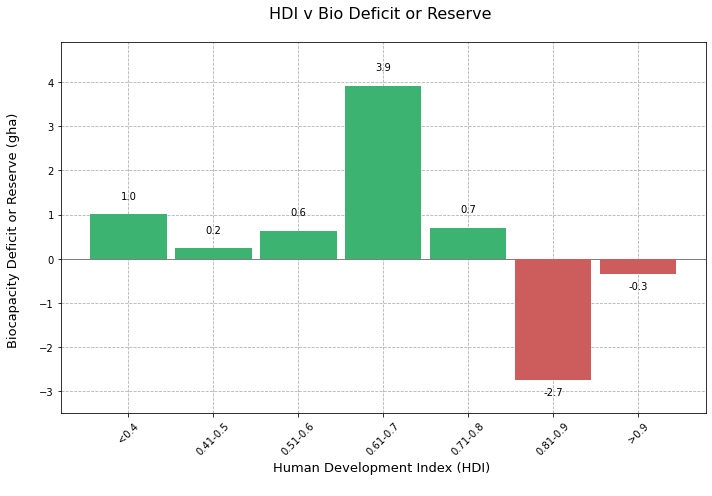

In [39]:
# calculating Biocapacity Deficit or Reserve mean
hdi_deficit= hdi_df.groupby("HDI Groups").mean()['Biocapacity Deficit or Reserve']
hdi_deficit = pd.DataFrame(hdi_deficit)

# data lists
deficit_reserve = hdi_deficit['Biocapacity Deficit or Reserve'].tolist()

# set up axes and formatting
fig, ax = plt.subplots(figsize = (10,7))
x_axis = np.arange(len(hdi_groups))
ax.set_xticks (x_axis)
ax.set_xticklabels (hdi_groups, rotation = 45)
plt.axhline(linewidth=1.0, color='grey')
plt.ylim(-3.5, max(deficit_reserve)+1.0)

plt.xlabel('Human Development Index (HDI) \n', fontsize=13)
plt.ylabel('Biocapacity Deficit or Reserve (gha) \n', fontsize=13)
plt.title('HDI v Bio Deficit or Reserve \n', fontsize=16)
plt.grid(linestyle= '--', zorder=0)

# selecting colors of bars
bar_color = []
for num in deficit_reserve:
    if num <= 0:
        bar_color.append('indianred')
    else:
        bar_color.append('mediumseagreen')

# bar chart
rects2 = ax.bar(x_axis, deficit_reserve, width = 0.9, color =bar_color, zorder=2)

# getting labels on each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height >= 0:
            label = height + 0.3
        else:
            label = height - 0.4
        ax.text(rect.get_x() + rect.get_width()/2, label, round(height,1),
        ha = 'center', va = 'bottom', alpha = 1)
autolabel(rects2)

# Save and show the figure
plt.tight_layout()
plt.show()

from above we observe that there is a biocapacity deficit among countries with higher HDI

**GDP vs Ecological Footprint**

In [42]:
# Create new GDP group dataframe
gdp_df = pd.DataFrame(clean_df)

# Create GDP bins
gdp_bins =[0, 1000, 7500, 15000, 35000, 70000, 140000]
gdp_labels = ["< \$1K", "\$1K-\$7.5K", "\$7.5K-\$15K", "\$15K-\$35K", "\$35-\$70K", "\$70K-\$140K"]

gdp_df["GDP Categories"] = pd.cut(gdp_df["GDP per Capita (USD)"], gdp_bins, labels=gdp_labels)

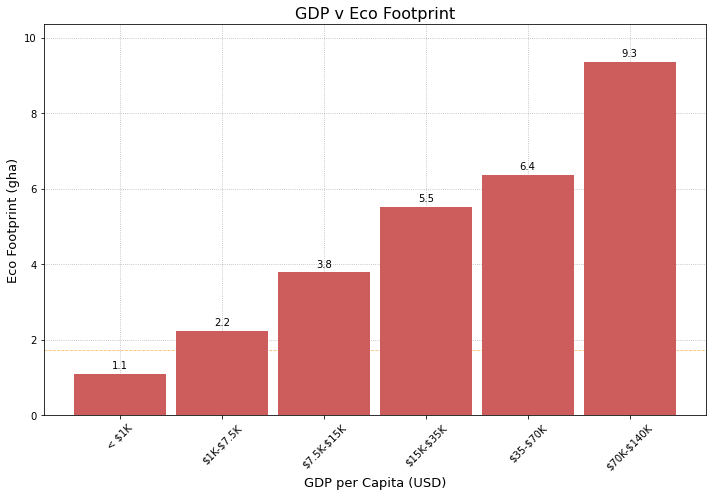

In [43]:
# calculating mean
gdp_earths = gdp_df.groupby("GDP Categories").mean()

# Bar chart
fig, ax = plt.subplots(figsize=(10,7))
y_values = gdp_earths["Eco Footprint per Person"].tolist()
x_ticks = np.arange(len(gdp_labels))
ax.set_xticks(x_ticks)
ax.set_xticklabels(gdp_labels, rotation=45)
plt.ylim(0, max(y_values)+1.0)

rects1 = plt.bar(gdp_labels, y_values, width=0.9, color='indianred', zorder=2)

# Set the labels
plt.title("GDP v Eco Footprint", fontsize=16)
plt.xlabel("GDP per Capita (USD)", fontsize=13)
plt.ylabel("Eco Footprint (gha)", fontsize=13)
plt.grid(linestyle='dotted', zorder=0)
plt.axhline(y=1.73, linewidth=0.8, linestyle = '--', color='darkorange', alpha=0.6, zorder=0)

# Label bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 0.1, round(height,1),
        ha = 'center', va = 'bottom', alpha = 1)
autolabel(rects1)

# Save and show the figure
plt.tight_layout()
plt.show()

**GDP v Biocapacity Reserve / Deficit**

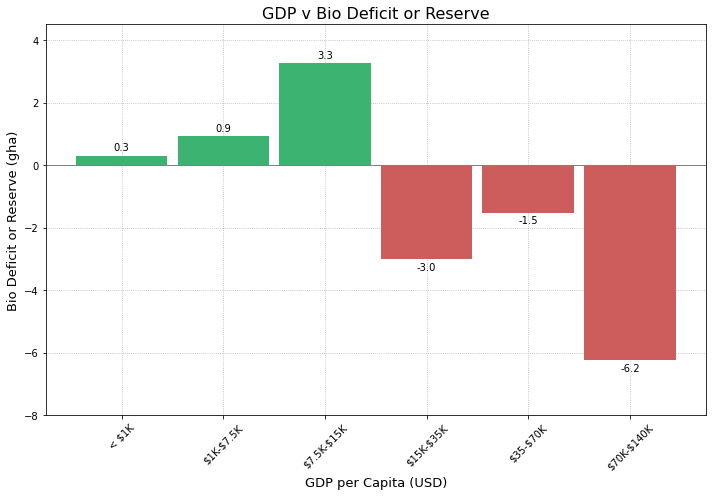

In [45]:
# calculating Biocapacity Deficit or Reserve mean
gdp_deficit = gdp_df.groupby("GDP Categories").mean()

# data list
y_values = gdp_deficit["Biocapacity Deficit or Reserve"].tolist()

# gdp_deficit

# set up axes and formatting
fig, ax = plt.subplots(figsize=(10,7))
x_ticks = np.arange(len(gdp_labels))
ax.set_xticks(x_ticks)
ax.set_xticklabels(gdp_labels, rotation=45)
plt.ylim(-8, 4.5)

plt.axhline(linewidth=1.0, color='grey')
plt.grid(linestyle='dotted', zorder=0)

plt.title("GDP v Bio Deficit or Reserve", fontsize=16)
plt.xlabel("GDP per Capita (USD)", fontsize=13)
plt.ylabel("Bio Deficit or Reserve (gha)", fontsize=13)

# Color the bars        
bar_color = []
for change in y_values:
    if change <= 0:
        bar_color.append('indianred')
    else:
        bar_color.append('mediumseagreen')

rects3 = ax.bar(x_ticks, y_values, width=0.9, color=bar_color, zorder=2)

# getting labels on each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height >= 0:
            label = height + 0.1
        else:
            label = height - 0.4
        ax.text(rect.get_x() + rect.get_width()/2, label, round(height,1),
        ha = 'center', va = 'bottom', alpha = 1)
autolabel(rects3)

# Save and show the figure
plt.tight_layout()
plt.show()

In [46]:
# Countries ranked by Eco Footprint
footprint_df = pd.DataFrame(ecodf.iloc[:,[0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18]])
footprint_df = footprint_df.sort_values('Earths Required')
footprint_df.reset_index(inplace=True, drop=True)
footprint_df

,Country,Region,Population (millions),HDI,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required
0,Eritrea,Africa,6.13,0.39,0.10,0.18,0.06,0.03,0.01,0.42,0.07,0.18,0.09,0.93,0.02,1.30,0.88,0.24
1,Timor-Leste,Asia-Pacific,1.11,0.60,0.25,0.07,0.04,0.06,0.02,0.48,0.21,0.06,0.52,0.94,0.04,1.78,1.30,0.28
2,Haiti,Latin America,10.17,0.48,0.27,0.04,0.10,0.15,0.01,0.61,0.18,0.03,0.01,0.01,0.03,0.27,-0.34,0.35
3,Bangladesh,Asia-Pacific,154.70,0.56,0.29,0.00,0.08,0.26,0.02,0.72,0.25,0.00,0.00,0.05,0.07,0.38,-0.35,0.42
4,Afghanistan,Middle East/Central Asia,29.82,0.46,0.30,0.20,0.08,0.18,0.00,0.79,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,United States of America,North America,317.50,0.91,1.13,0.30,0.67,5.90,0.12,8.22,1.49,0.28,1.57,0.33,0.09,3.76,-4.46,4.75
184,Australia,Asia-Pacific,23.05,0.93,2.68,0.63,0.89,4.85,0.11,9.31,5.42,5.81,2.01,3.19,0.14,16.57,7.26,5.37
185,Qatar,Middle East/Central Asia,2.05,0.85,0.57,0.27,0.15,9.57,0.19,10.80,0.01,0.00,0.00,1.17,0.06,1.24,-9.56,6.24
186,Aruba,Latin America,0.10,NaN,NaN,NaN,NaN,NaN,NaN,11.88,NaN,NaN,NaN,NaN,NaN,0.57,-11.31,6.86


In [48]:
footprint_India = footprint_df[footprint_df.Country == "India"]
footprint_India

,Country,Region,Population (millions),HDI,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required
25,India,Asia-Pacific,1236.69,0.6,0.34,0.01,0.14,0.61,0.02,1.16,0.35,0.0,0.02,0.03,0.05,0.45,-0.71,0.67


From the above results we can Infer although **India has a biodiversity deficit, the ecological footprint is not too depleted.**

The earth required by a country is the measure of the earth's resources required by the country to full fill its populations needs. 

The earths required of the country is calculated by total ecological footprint of that country divided by the global footprint (1.75 GHA), which is the no of earths required by the entire world to sustain its life.

India has lesser Ecological footprint than the Global footprint (0.67 earths required). 

India has a HDI 0.6, so lets observe how India stands within that HDI class

**Ecological Footprint Composition for each HDI Group**

In [49]:
# Create new dataframe with parts of Eco Footprint
composition_df = pd.DataFrame(footprint_df)
composition_df["HDI Groups"] = pd.cut(composition_df["HDI"], hdi_bins, labels=hdi_groups)
composition_df = composition_df.groupby('HDI Groups').mean()

# New dataframe with Bio Deficits or Reserves only
landuse = pd.DataFrame({
    'Eco Footprint per Person' : composition_df['Total Ecological Footprint'],
    'Biocapacity per Person' : composition_df['Total Biocapacity'],
    'Total Bio Deficit or Reserve' : composition_df['Biocapacity Deficit or Reserve'],
    'Carbon Deficit or Reserve' : composition_df['Urban Land'] - composition_df['Carbon Footprint'],
    'Cropland Deficit or Reserve' : composition_df['Cropland'] - composition_df['Cropland Footprint'],
    'Forest Deficit or Reserve' : composition_df['Forest Land'] - composition_df['Forest Footprint'],
    'Grazing Deficit or Reserve' : composition_df['Grazing Land'] - composition_df['Grazing Footprint'],
    'Fish Deficit or Reserve' : composition_df['Fishing Water'] - composition_df['Fish Footprint'],
    'Earths Required' : composition_df['Earths Required'],
}) 
# round all float numbers to nearest tenth
landuse = landuse.round(2)

# Conditional color formatting
def highlight_pos(value):
    is_pos = value >= 0
    return ['background-color: lightseagreen' if v else 'background-color: lightcoral' for v in is_pos]

df_slice = pd.IndexSlice[:, 'Total Bio Deficit or Reserve':'Fish Deficit or Reserve']
landuse.style.apply(highlight_pos, subset = df_slice)

,Eco Footprint per Person,Biocapacity per Person,Total Bio Deficit or Reserve,Carbon Deficit or Reserve,Cropland Deficit or Reserve,Forest Deficit or Reserve,Grazing Deficit or Reserve,Fish Deficit or Reserve,Earths Required
HDI Groups,,,,,,,,,
<0.4,1.130000,2.140000,1.010000,-0.030000,-0.010000,0.850000,0.100000,0.140000,0.650000
0.41-0.5,1.260000,1.500000,0.230000,-0.180000,-0.050000,0.230000,0.170000,0.180000,0.730000
0.51-0.6,1.520000,2.150000,0.630000,-0.390000,-0.040000,0.690000,0.350000,0.130000,0.880000
0.61-0.7,2.320000,6.040000,3.720000,-1.020000,-0.030000,4.020000,0.500000,0.540000,1.340000
0.71-0.8,3.370000,4.070000,0.700000,-1.910000,-0.120000,2.360000,0.160000,0.460000,1.940000
0.81-0.9,5.840000,3.100000,-2.750000,-3.790000,-0.090000,0.500000,-0.100000,0.270000,3.380000
>0.9,6.520000,6.180000,-0.340000,-3.970000,0.430000,1.380000,0.640000,0.960000,3.760000


Total Eco Footprint and Carbon Deficit are rather high around HDI groups 0.7 and 0.8 where 
countries are reaching a "developed" stage. 

All groups have a Carbon Deficit which shows 
that Urban Land is where most ecological assets are being consumed rather than produced.

**Observation**

India lies in the group 0.51-0.6. 

we can infer that
>- India's footprint(1.16) is well below the group's average(1.5)
>- India has a Biodiversity deficit against the group's expectation to have a reserve
>- India 0.67 earths compared to group's 0.88 earths required.

This presents a hope that the change will not be impossible